In [61]:
import numpy as np
import matplotlib.pyplot as plt
import fmri_tools
from nilearn import image, plotting
from nilearn.glm import threshold_stats_img
from nilearn.plotting import plot_contrast_matrix

%matplotlib inline

In [2]:
session_files = [r'C:\Users\carst\Google Drive\05_Projects\NET_fMRI\src\des_analysis\opto\cm033_zj1opto_001.csv',
                 r'C:\Users\carst\Google Drive\05_Projects\NET_fMRI\src\des_analysis\opto\cm033_zj1opto_002.csv',
                 r'C:\Users\carst\Google Drive\05_Projects\NET_fMRI\src\des_analysis\opto\cm033_zj1opto_003.csv']

subject_folder = r'C:\Users\carst\Google Drive\05_Projects\NET_fMRI\CM033.zJ1'

In [3]:
fmri = fmri_tools.FMRIDataProcessor()

In [4]:
fmri.hrf_model = 'spm'
fmri.drift_model = 'cosine'
fmri.high_pass = 0.01
fmri.noise_model = "ar1"
fmri.smoothing_fwhm = 3

In [5]:
session_info = fmri.load_session_files(session_files)

In [6]:
filenames = fmri.get_data_filenames(subject_folder, session_info)

In [7]:
fmri_img = fmri.load_fmri_data(filenames)

In [8]:
fmri_img = fmri.resample_fmri_data(fmri_img)

In [9]:
design_matrices = fmri.create_design_matrix(fmri_img, filenames)

In [10]:
fmri_glm = fmri.fit_glm(fmri_img, design_matrices)

In [11]:
basic_contrasts = fmri.create_contrast_matrix(design_matrices)

In [12]:
contrasts = fmri.create_contrasts(basic_contrasts)

In [13]:
mean_data = image.mean_img(fmri_img)

For details on statistics [see](https://nilearn.github.io/stable/auto_examples/00_tutorials/plot_single_subject_single_run.html#sphx-glr-auto-examples-00-tutorials-plot-single-subject-single-run-py)

C:\Users\carst\AppData\Local\Temp\ipykernel_2972\1414340195.py:3: UserWarning: One contrast given, assuming it for all 3 runs
  z_map = fmri_glm.compute_contrast(contrast_val, output_type="z_score")
C:\Users\carst\anaconda3\envs\fmri\lib\site-packages\nilearn\glm\thresholding.py:297: UserWarning: The given float value must not exceed 3.684371110943705. But, you have given threshold=4.7968488457610325.
  stat_img = threshold_img(


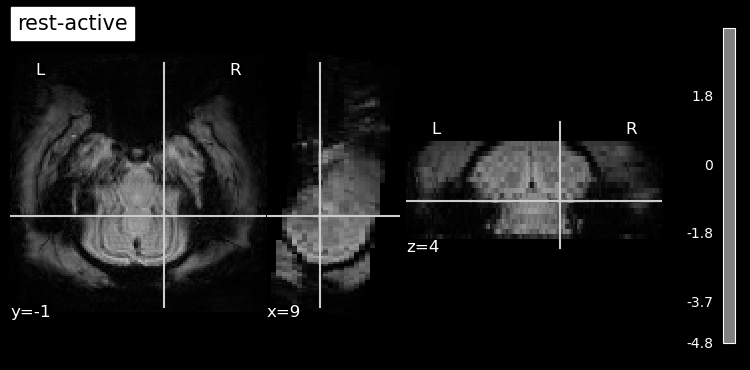

C:\Users\carst\AppData\Local\Temp\ipykernel_2972\1414340195.py:3: UserWarning: One contrast given, assuming it for all 3 runs
  z_map = fmri_glm.compute_contrast(contrast_val, output_type="z_score")
C:\Users\carst\anaconda3\envs\fmri\lib\site-packages\nilearn\glm\thresholding.py:297: UserWarning: The given float value must not exceed 3.684371110943705. But, you have given threshold=4.7968488457610325.
  stat_img = threshold_img(


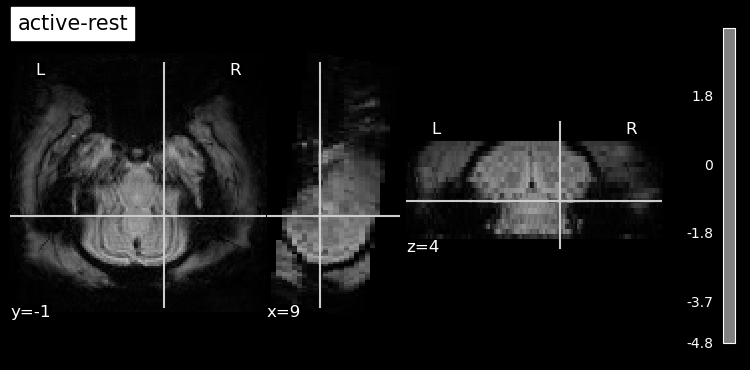

C:\Users\carst\AppData\Local\Temp\ipykernel_2972\1414340195.py:3: UserWarning: One contrast given, assuming it for all 3 runs
  z_map = fmri_glm.compute_contrast(contrast_val, output_type="z_score")
C:\Users\carst\anaconda3\envs\fmri\lib\site-packages\nilearn\glm\contrasts.py:159: UserWarning: Running approximate fixed effects on F statistics.
  contrast = contrast_ if contrast is None else contrast + contrast_


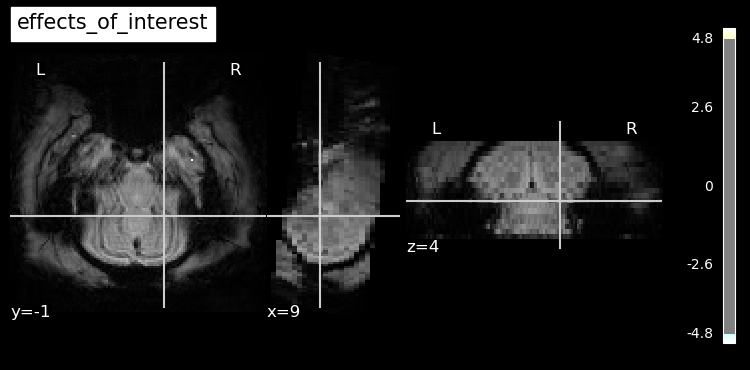

In [14]:
for contrast_id, contrast_val in contrasts.items():

    z_map = fmri_glm.compute_contrast(contrast_val, output_type="z_score")
    _, threshold = threshold_stats_img(z_map, alpha=0.05, height_control="bonferroni", cluster_threshold=10)

    plotting.plot_stat_map(
        stat_map_img=z_map,
        threshold=threshold,
        cut_coords = [9, -1, 4],
        bg_img=mean_data,
        title=contrast_id,
    )
    plotting.show()

C:\Users\carst\AppData\Local\Temp\ipykernel_2972\2434221722.py:1: UserWarning: One contrast given, assuming it for all 3 runs
  z_map = fmri_glm.compute_contrast(contrasts['effects_of_interest'], output_type="z_score")
C:\Users\carst\anaconda3\envs\fmri\lib\site-packages\nilearn\glm\contrasts.py:159: UserWarning: Running approximate fixed effects on F statistics.
  contrast = contrast_ if contrast is None else contrast + contrast_


1.9599639845400545


C:\Users\carst\anaconda3\envs\fmri\lib\site-packages\numpy\core\fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



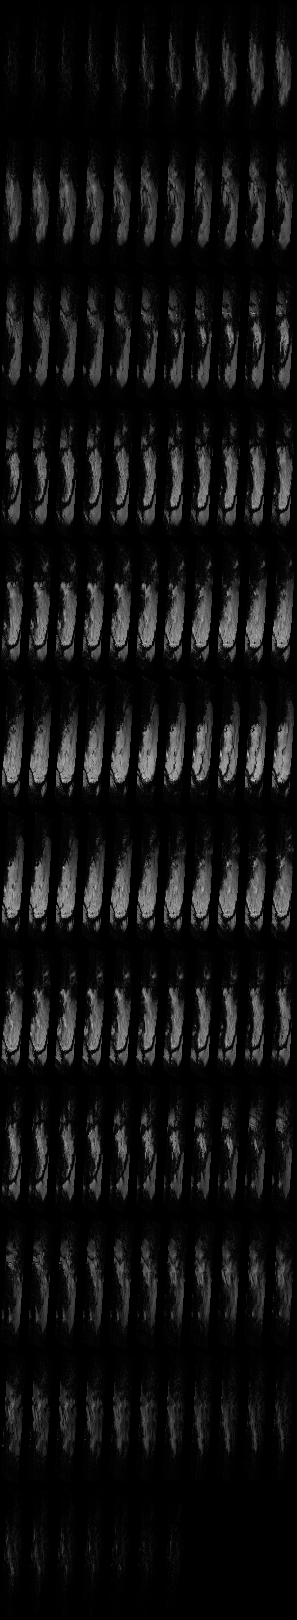
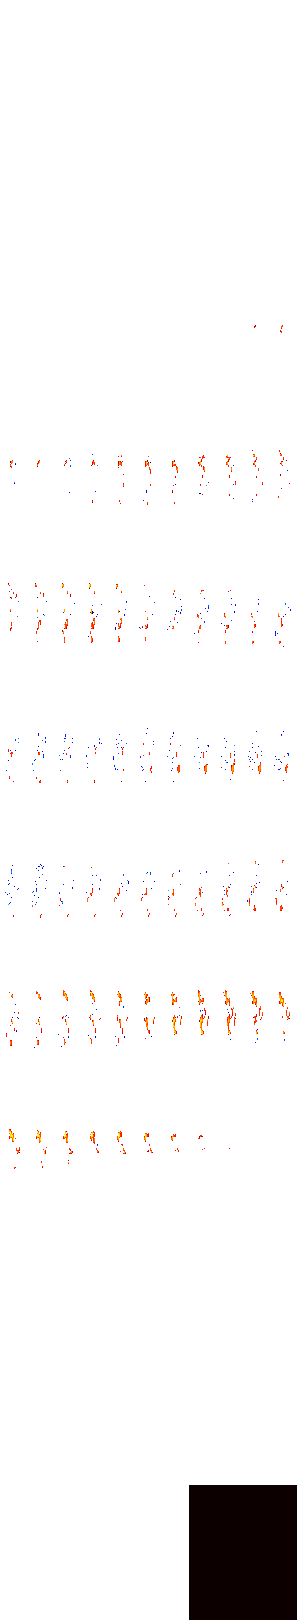

In [20]:
z_map = fmri_glm.compute_contrast(contrasts['effects_of_interest'], output_type="z_score")
_, threshold = threshold_stats_img(z_map, alpha=0.05, height_control="fpr", cluster_threshold=10)
print(threshold)

ax_stat = plotting.view_img(
    stat_map_img=z_map, 
    threshold=threshold,
    cut_coords = [9, 5, 4],
    bg_img=mean_data,      
    title="Activation Map")

ax_stat.resize(1050, 550)

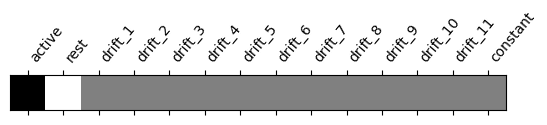

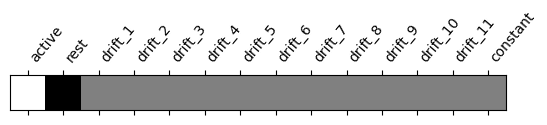

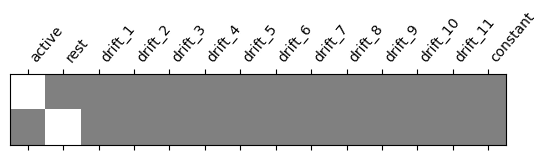

In [16]:
for contrast_id, contrast_val in contrasts.items():
    plot_contrast_matrix(contrast_val, design_matrix=design_matrices[0])

Read in and prepare all the relevant data 

Text(0.5, 1.0, 'Expected Response')

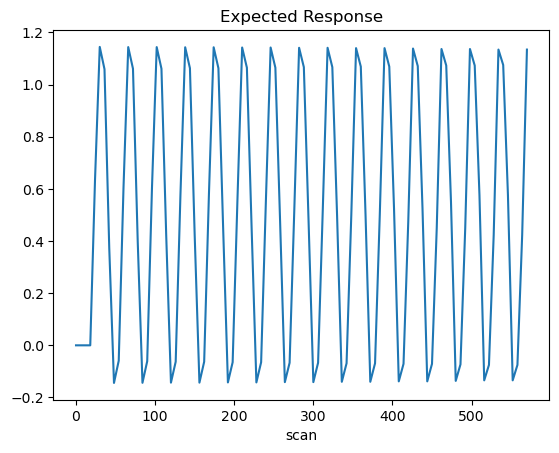

In [17]:
fig, ax = plt.subplots(1, 1)
ax.plot(design_matrices[0]['active'])
ax.set_xlabel("scan")
ax.set_title("Expected Response")

In [34]:
filenames = fmri.get_data_filenames(subject_folder, session_info)['signal_file']

In [121]:
signal, meta = fmri.read_h5(filenames[2])

In [122]:
start = 0
stop = len(signal[0]) / meta['scan_rate_hz']
step = 1 / meta['scan_rate_hz']

signal_time = np.arange(start, stop, step)

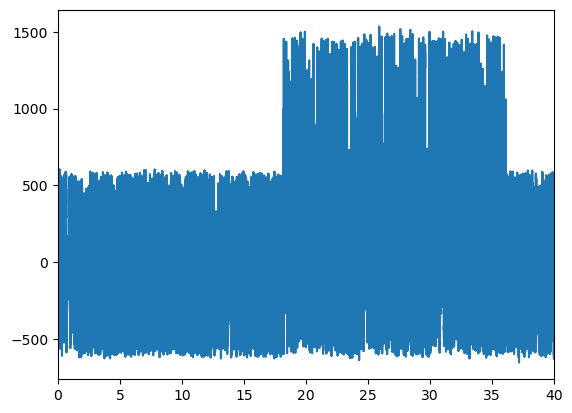

In [142]:
channel = 3 # 2, 3
end_time = 1000000

plt.plot(signal_time[:end_time], signal[channel][:end_time])
plt.xlim([0, 40])
plt.show()